In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
import imutils
import argparse
import os
import math
import random
import pandas as pd
import skimage.data
import skimage.transform
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn import metrics
from skimage.feature import hog
import joblib

In [2]:
dataset_path = 'C:\\Users\\lenovo\\Desktop\\test_1\\'
labels = []

In [3]:
num = [104, 54, 110, 36, 29, 56, 110, 126, 135, 104]

for i, element in enumerate(num):
    for j in range(element):
        labels.append(i + 1)

In [4]:
X_feature = []
images = []

for img_name in os.listdir(dataset_path):
    path = os.path.join(dataset_path, img_name)
    if not path[-3:] == 'png':
        continue
    img = cv2.imread(path)
    x = img
    x = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 转为灰度图
    img = skimage.transform.resize(img, (128, 128))
    x_feature = hog(img, orientations=8, pixels_per_cell=(10, 10),
                cells_per_block=(1, 1), visualize=False, multichannel=False)
#     print(x_feature)
#     print(x_feature.shape)
    images.append(x)
    X_feature.append(x_feature)
# print(X_feature)
X_feature = np.array(X_feature)
# print(X_feature.shape)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_137468/1691003144.py:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  x_feature = hog(img, orientations=8, pixels_per_cell=(10, 10),


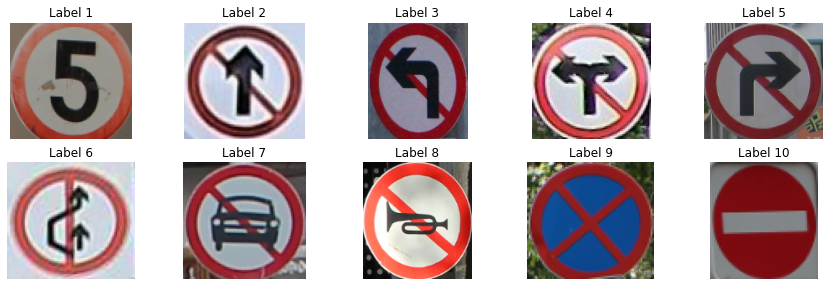

In [10]:
def display_images_and_labels_of_all_classes(images, labels):
    unique_labels = set(labels) # 创建无序不重复元素集
    plt.figure(figsize=(15, 15)) # 15 * 15
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)] # index()函数用于从列表中找出某个值第一个匹配项的索引位置
        plt.subplot(6, 5, i)  # 8 * 8 i表示第i个子图
        plt.axis('off') # 不显示坐标轴
        plt.title(f'Label {label}')
        i += 1
        plt.imshow(image)
#         plt.imshow(img[:, :, ::-1])
    plt.show()

display_images_and_labels_of_all_classes(images, labels)

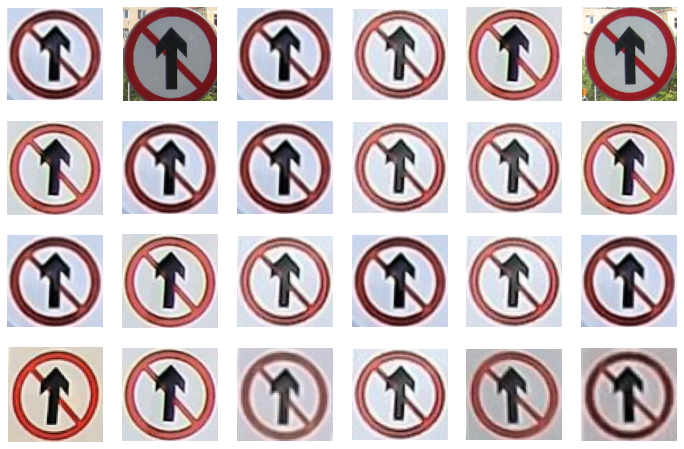

In [20]:
def display_images_and_labels_of_one_class(images, label):
    limit = 24  # 最多展示图片数量
    plt.figure(figsize=(12, 8))
    i = 1
    start = labels.index(label) # 开始图片索引
    end = start + labels.count(label) # 结束图片索引
    for image in images[start:end][:limit]:
        plt.subplot(4, 6, i)  # 4 * 6
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_images_and_labels_of_one_class(images, 2)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature, labels, train_size=0.8,test_size=0.2)

In [22]:
from sklearn.svm import SVC
model = SVC() #支持向量机
model.fit(x_train, y_train)   
y_pred = model.predict(x_test)

# print(type(x_test))
# f = np.array(x_test)
# print(f.shape)
# m = x_test[0].reshape(1, -1)
# y_pred = model.predict(m)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

1.0
